# **Introduction**
Welcome to possibly your first python notebook! You do not need to know any coding to use this notebook, but if you are interested in getting into coding, all the code that makes this notebook is right in front of you!

# **What this notebook does**
This notebook is written to give a cursory simulation of a chemical reaction from the rate laws we have learned in class. Often chemists will know the equation for what the rate of the reaction will be, but trying to actually find what the concentration of a chemical will be at a later time is really hard to figure out! So what we do is 
- Have a computer use our rate equation to get the rate of reaction *(think what numbers the computer will need to find the rate of reaction)*
- Assume that that rate is now permanent (ie constant), so that we can find the concentration at a very slightly later time
- Get rid of that assumption and have our computer go back to our rate equation to find a *new* rate of reaction
- Wash, rinse, repeat, until we have the answers we're looking for!

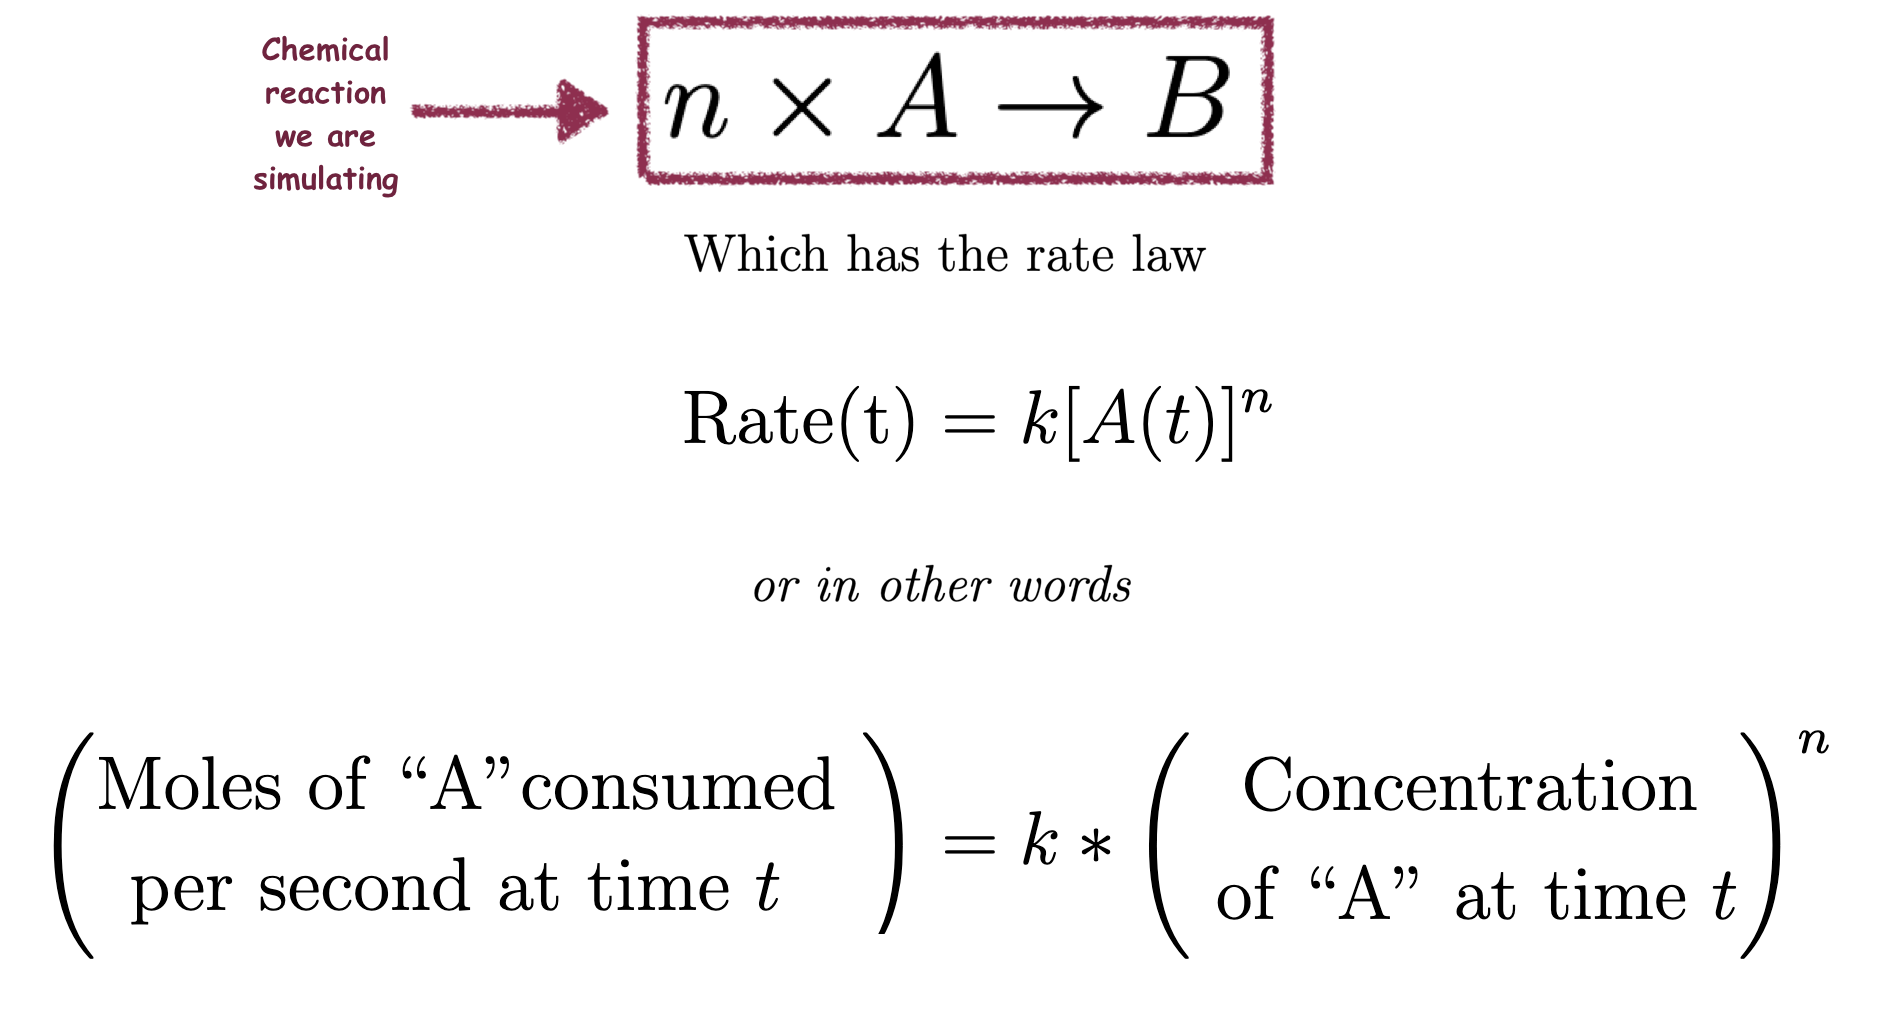

# Run this cell for a Youtube animation of this simulator

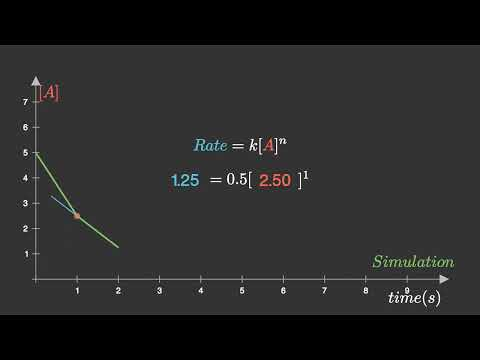

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('YyzeV995n-U')

# **How to use this notebook**
To use this notebook, all you need to do is to run each cell/block of code in order. You can run a block by either
- Pressing shift+return on your keyboard
- Clicking the circled arrow that appears on the top left of each cell


There's a lot of text on this page, but you can safely ignore all of it except the fancy text in blocks like this, or any "comments" in the code (should be highlighted in green)

## **Look at code below!**
Here we have some math variables 'defined' below. Feel free to play around with these numbers are set to and see how it changes the plots we get in the next cell! Just remember to run the settings cell *before* running the simulation cell

In [4]:
# 'n' sets the order of "A" for the reaction we are about to look at
n = 1.0

# 'k' sets the rate constant for the reaction
k = 0.5 # in units determined by the order chosen

# 'initial_concentration' sets what concentration of "A" we start off with
initial_concentration = 5 # in units M

# 't_max' tells the computer how many seconds we *want* to simulate
### note - this program will automatically cut off your simulation once 
###        concentration reaches 0 or a negative number
t_max = 10 # in seconds

# 'dt' sets the size of our timestep (how many seconds into the future the 
# computer goes until re-calculating the rate of the reaction)
dt = 0.001 # in seconds

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

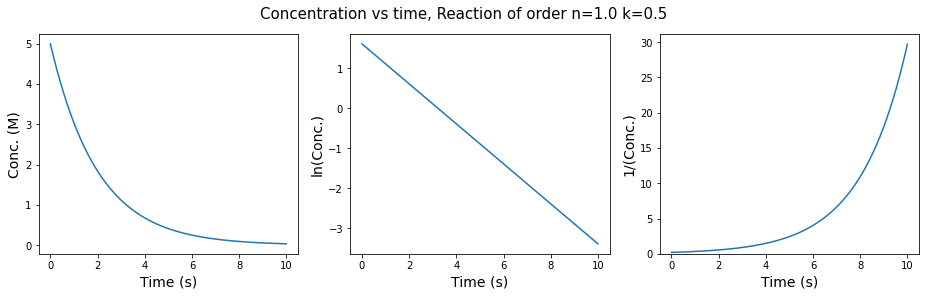

In [5]:
# Run me to run the simulation and get your plots!

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import files

width = 8.5/2.0
height = (5.0 / 7.0) * width
t_min = 0.
tpoints = int((t_max - t_min)/dt + 1)
time_array = dt * np.arange(0, tpoints)

# the computer uses this function to take a step into the future once we have 
# the rate at a particular time
def euler_explicit_step(y_deriv_function, t_now, y_now, dt):
    return y_now + y_deriv_function(t_now, y_now) * dt 

# this function just makes sure the "euler_explicit_step" function gets looped
# correctly
def integrate_ode(ode_function, y0, time_array, dt, method='euler'):
    tpoints = len(time_array)
    if np.ndim(y0) == 0:
        solution = np.empty([tpoints])
    else:
        solution = np.empty([tpoints, y0.shape[0]])
    solution[0] = y0
    for i in range(tpoints-1):
        time_now = time_array[i]
        solution[i+1] = euler_explicit_step(ode_function, time_now, solution[i], dt)
    return solution

# the computer uses this function for evaluating the rate given a particular
# concentration, order, and rate constant
def unimolec_rate(t, concentration, order = n, rate_constant = k):
  if concentration <= 0:
    return 0
  else: 
    return -rate_constant*(concentration**order)
    

# now we store our simulation data in the "data" variable
data = integrate_ode(unimolec_rate, initial_concentration, time_array, dt,
                     method='euler')

# and here we cut off the simulation data once we get to a concentration of 0
for i in np.arange(len(data)):
  if data[i] <= 0.0000001:
    end_i = i - 1
    break
  end_i = i
data = data[0:end_i]
time_array = time_array[0:end_i]


# and here we organize the data so its easier to use once downloaded
raw_data = np.transpose([data, time_array])
fname = ('data_n-' + str(n) + '_k-' + str(k) + '_init-' 
         + str(initial_concentration) + '_dt-' + str(dt) + '.txt')
np.savetxt(fname, raw_data)


################################################################################
######### "Comment" out the line below (files.download(fname)) #################
########### by putting a "#" symbol to the left of the text ####################
############ to stop downloading with every simulation run #####################
################################################################################
files.download(fname)
################################################################################
################################################################################



# here we plot the data (or0), along with plotting 
# ln() (or1) and 1/() (or2) of our data
fig, (or0, or1, or2) = plt.subplots(1, 3, constrained_layout = True)
or0.plot(time_array, data)
or0.set_xlabel('Time (s)', fontsize=14)
or0.set_ylabel('Conc. (M)', fontsize=14)
or1.plot(time_array, np.log(data))
or1.set_xlabel('Time (s)', fontsize=14)
or1.set_ylabel('ln(Conc.)', fontsize=14)
or2.plot(time_array, 1/(data))
or2.set_xlabel('Time (s)', fontsize=14)
or2.set_ylabel('1/(Conc.)', fontsize=14)
fig.suptitle('Concentration vs time, Reaction of order n=' 
             + str(n) + ' k=' + str(k), fontsize=15)
fig.set_figwidth(width*3)

or2.set_ylim(bottom=0)

plt.show()

# **Next Steps**
The above block should have downloaded a text file to your computer. Import this to an Excel spreadsheet following the instructions in the lab handout. 

##### **- Formatting**
- Adjust the formatting for all of your Excel graphs to roughly match the formatting of the graphs shown above. This includes labeling your axes with the correct units, and providing an appropriate graph title. 
- On each of these graphs, have Excel make a linear regression and show the equation and $R^2$ value.